<a href="https://colab.research.google.com/github/vidakpop/-GBV-Tweet-classification-/blob/main/Datathon_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gender Based Violence - Tweet classification challenge

This challenge aims to classify tweets about GBV without using keywords.

Are you able to develop a machine learning model that can classify a tweet about gender-based violence into either of the five categories:
- Sexual violence
- Emotional violence
- Economic violence
- Physical violence
- Harmful traditional practice


### Install modules/package

In [ ]:
!pip install -U nltk #natural language toolkit

### import libraries/modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

### load the dataset

In [ ]:
urltrain='https://raw.githubusercontent.com/vidakpop/-GBV-Tweet-classification-/refs/heads/main/Train.csv'

In [ ]:
train = pd.read_csv(urltrain)

In [ ]:
train.head()

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence


In [ ]:
urltest="https://raw.githubusercontent.com/vidakpop/-GBV-Tweet-classification-/refs/heads/main/Test.csv"

In [ ]:
test = pd.read_csv(urltest)

In [ ]:
test.head()

,Tweet_ID,tweet
0,ID_0095QL4S,"because he was my boyfriend, and if I said no,..."
1,ID_00DREW5O,"lol no, I'm telling you it's not legal. It's l..."
2,ID_00E9F5X9,Somalia's semi-autonomous Puntland region has ...
3,ID_00G9OSKZ,University of Cape Coast students being robbed...
4,ID_00HU96U6,"""Somebody came up behind him and stabbed him i..."


### EDA

In [ ]:
train.shape # the training dataset has 39650 rows

(39650, 3)

In [ ]:
train["type"].unique()

array(['sexual_violence', 'Physical_violence', 'emotional_violence',
       'Harmful_Traditional_practice', 'economic_violence'], dtype=object)

In [ ]:
Data Cleaning



<Axes: xlabel='count', ylabel='type'>

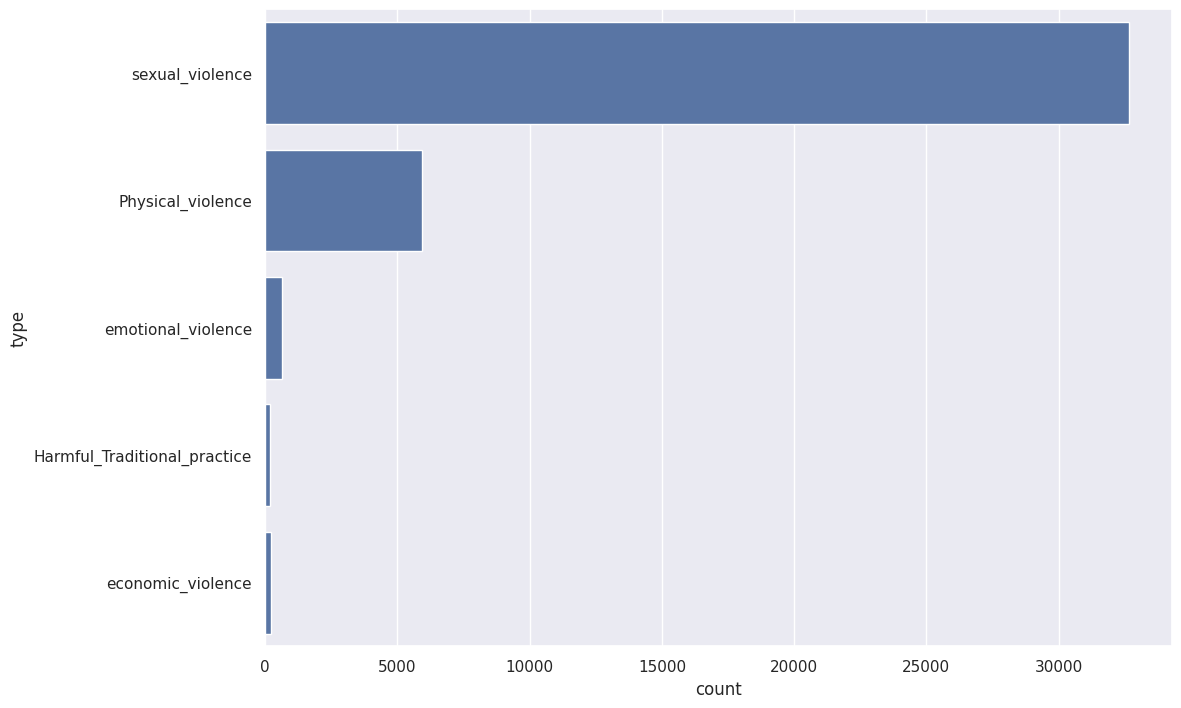

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.countplot(train["type"])

This dataset is highly imbalanced; from the graphs above, sexual violence is about 80%+.

In [ ]:
test.shape # the test dataset has 15581 rows

(15581, 2)

### Create models

Before we develop our models, we can set aside some validation dataset for inference purposes. We'll use scikit learn train test split module.https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
X = train.drop(["type"], axis=1)
y = train["type"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

CountVectorizer -converts text files/data into numerical feature vectors. You can find more information on CountVectorizer  here  https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [ ]:
vectorizer = CountVectorizer()

# fit_transform our tweets values to numerical vectors
x_train_counts = vectorizer.fit_transform(X_train["tweet"])
x_train_counts

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 824624 stored elements and shape (26565, 30352)>

In [ ]:
print(vectorizer.get_feature_names_out())

['00' '000' '00006' ... '𝙻𝚊𝚜𝚝' '𝚂𝚝𝚊𝚛' '𝚙𝚘𝚟']


Using the CountVectorizer is effective, but this might give more preference to longer tweets than others. Let's try using frequencies. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html

In [ ]:
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
x_train_tfidf.shape

(26565, 30352)

Multiple algorithms are used for text classification; let’s look at:-

### 1. Naive Bayes MultinomialNB https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [ ]:
# train.type.values our y values
clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                  ('clf', MultinomialNB())])
clf = clf.fit(X_train["tweet"], y_train)

### evaluation metric
The evaluation metric on the Zindi leaderboard is accuracy; let’s test our simple model,

In [ ]:
predicted = clf.predict(X_test.tweet)

In [ ]:
predicted

array(['sexual_violence', 'sexual_violence', 'sexual_violence', ...,
       'sexual_violence', 'sexual_violence', 'sexual_violence'],
      dtype='<U28')

In [ ]:
np.unique(predicted)

array(['Physical_violence', 'emotional_violence', 'sexual_violence'],
      dtype='<U28')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predicted)

0.8871226595338173

- Our simple model gave us an accuracy score of 88%, fair enough, but you should also be careful that the data is highly imbalanced, as discussed earlier.

- Question? Is the imbalance percentage the same as in the test? Can you think of various ways to deal with the imbalance dataset

- We can also see the only 3 categories(i.e 'Physical_violence', 'emotional_violence', 'sexual_violence') were predicted yet we have 5 categories. Therefore 88% might not be that good.


### submission

In [ ]:
urlsample="https://raw.githubusercontent.com/vidakpop/-GBV-Tweet-classification-/refs/heads/main/SampleSubmission.csv"
sample_submission = pd.read_csv(urlsample)

In [ ]:
sample_submission.head()

,Tweet_ID,type
0,ID_0095QL4S,NaN
1,ID_00DREW5O,NaN
2,ID_00E9F5X9,NaN
3,ID_00G9OSKZ,NaN
4,ID_00HU96U6,NaN


In [ ]:
##let's prdict on the test data
test_predict = clf.predict(test.tweet)

In [ ]:
test_predict

array(['sexual_violence', 'sexual_violence', 'sexual_violence', ...,
       'sexual_violence', 'sexual_violence', 'sexual_violence'],
      dtype='<U28')

In [ ]:
np.unique(test_predict)

array(['Physical_violence', 'sexual_violence'], dtype='<U28')

In [ ]:
sample_submission["type"] = test_predict

In [ ]:
sample_submission.to_csv('baseline_sub.csv', index=False)

### To do,
- Do more analysis
- Try working on ways to balance the dataset, undersampling, oversampling, using SMOTE, etc
- You can try other text classification models, e.g., using nltk, etc.


In [1]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# STEP 2: LOAD DATA
urltrain = 'https://raw.githubusercontent.com/vidakpop/-GBV-Tweet-classification-/refs/heads/main/Train.csv'
train = pd.read_csv(urltrain)
urltest = "https://raw.githubusercontent.com/vidakpop/-GBV-Tweet-classification-/refs/heads/main/Test.csv"
test = pd.read_csv(urltest)


In [3]:
def clean_text(text):
  text = text.lower()
  text = re.sub(r"http\S+", "", text)
  text = re.sub(r"@\w+", "", text)
  text = re.sub(r"#\w+", "", text)
  text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
  return text.strip()


In [4]:
train['clean_tweet'] = train['tweet'].apply(clean_text)
test['clean_tweet'] = test['tweet'].apply(clean_text)

In [5]:
train.shape

(39650, 4)

In [6]:
train.head()

,Tweet_ID,tweet,type,clean_tweet
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence,had a dream i got raped last night by a guy i ...
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence,he thought the word raped means sex and told m...
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence,she not talking to me i was raped by 2 men 1 m...
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence,i was sexually abused for 3 years at age 4 to ...
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence,chessy prout can do better by telling the trut...


In [7]:
test.head()

,Tweet_ID,tweet,clean_tweet
0,ID_0095QL4S,"because he was my boyfriend, and if I said no,...",because he was my boyfriend and if i said no h...
1,ID_00DREW5O,"lol no, I'm telling you it's not legal. It's l...",lol no im telling you its not legal its litera...
2,ID_00E9F5X9,Somalia's semi-autonomous Puntland region has ...,somalias semiautonomous puntland region has ta...
3,ID_00G9OSKZ,University of Cape Coast students being robbed...,university of cape coast students being robbed...
4,ID_00HU96U6,"""Somebody came up behind him and stabbed him i...",somebody came up behind him and stabbed him in...


#Unsupervised embedding

embedding using paraphrase-mpnet-base-v2 found its better than MiniLM

In [8]:
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer('paraphrase-mpnet-base-v2')
X_train_embed = embedding_model.encode(train['clean_tweet'].tolist(),show_progress_bar=True)
X_test_embed = embedding_model.encode(test['clean_tweet'].tolist(),show_progress_bar=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/594 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1240 [00:00<?, ?it/s]

Batches:   0%|          | 0/487 [00:00<?, ?it/s]

# Embedding with paraphrase-mpnet-base-v2

In [9]:
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer('paraphrase-mpnet-base-v2')
X_train_embed = embedding_model.encode(train['clean_tweet'].tolist(), show_progress_bar=True)
X_test_embed = embedding_model.encode(test['clean_tweet'].tolist(), show_progress_bar=True)


Batches:   0%|          | 0/1240 [00:00<?, ?it/s]

Batches:   0%|          | 0/487 [00:00<?, ?it/s]

# Encode Labels

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(train['type'])

# Check class distribution
pd.Series(train['type']).value_counts(normalize=True)


,proportion
type,
sexual_violence,0.823405
Physical_violence,0.149962
emotional_violence,0.016419
economic_violence,0.005473
Harmful_Traditional_practice,0.004741


# Handle Imbalance with SMOTE

In [11]:
from imblearn.over_sampling import SMOTE
X_smote, y_smote = SMOTE(random_state=42).fit_resample(X_train_embed, y)


# Classifier: LightGBM

In [12]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train, X_val, y_train, y_val = train_test_split(X_smote, y_smote, stratify=y_smote, test_size=0.2, random_state=42)

lgb_clf = lgb.LGBMClassifier(class_weight='balanced', random_state=42)
lgb_clf.fit(X_train, y_train)
y_pred = lgb_clf.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred, target_names=le.classes_))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.870765 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 130592, number of used features: 768
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Validation Accuracy: 0.9983766233766234
                              precision    recall  f1-score   support

Harmful_Traditional_practice       1.00      1.00      1.00      6530
           Physical_violence       1.00      1.00      1.00      6529
           economic_violence       1.00      1.00      1.00      6530
          emotional_violence       1.00      1.00      1.00      6530
             sexual_violence       1.00      0.99      1.00      6529

                    accuracy                           1.00     32648
                   macro avg       1.00      1.00      1.00     32648
                weighted avg       1.00      1.00      1.00     32648



In [14]:
test_preds = lgb_clf.predict(X_test_embed)
final_labels = le.inverse_transform(test_preds)

submission = pd.read_csv("https://raw.githubusercontent.com/vidakpop/-GBV-Tweet-classification-/refs/heads/main/SampleSubmission.csv")
submission['type'] = final_labels
submission.to_csv('submission_boosted.csv', index=False)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


#Trying to imporve the accursacy to avoid overfitting

#SMOTE + TOMEK(better synthetic sampling)

In [ ]:
from imblearn.combine import SMOTETomek
X_resampled, y_resampled = SMOTETomek(random_state=42).fit_resample(X_train_embed,y)